In [ ]:
import pandas as pd
df = pd.read_csv("Advertising.csv")
df.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [ ]:
df_cleaned = df.dropna(subset=["TV", "Radio", "Newspaper", "Sales"])
df_cleaned.head(10)


,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
5,6,8.7,48.9,75.0,7.2
6,7,57.5,32.8,23.5,11.8
7,8,120.2,19.6,11.6,13.2
8,9,8.6,2.1,1.0,4.8
9,10,199.8,2.6,21.2,10.6


In [ ]:
X = df_cleaned[["TV", "Radio", "Newspaper"]]
Y = df_cleaned[["Sales"]]

X.head(10)


,TV,Radio,Newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4
5,8.7,48.9,75.0
6,57.5,32.8,23.5
7,120.2,19.6,11.6
8,8.6,2.1,1.0
9,199.8,2.6,21.2


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 10)

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, Y_train)

LinearRegression()

In [ ]:
prediction = model.predict(X_test)
prediction

array([[18.1625299 ],
       [12.92663232],
       [18.0531098 ],
       [23.64464668],
       [20.70438374],
       [14.28227997],
       [14.94493548],
       [21.38232981],
       [21.17508238],
       [12.73110461],
       [24.00312134],
       [ 7.21544071],
       [12.24762152],
       [19.24345998],
       [19.38241854],
       [13.45643798],
       [19.6247089 ],
       [ 9.2531648 ],
       [21.13268075],
       [20.90762408],
       [15.53485445],
       [10.92529369],
       [22.82955184],
       [15.8122438 ],
       [17.42515749],
       [ 8.16218669],
       [11.89783444],
       [12.70337575],
       [21.74138085],
       [ 7.96215368],
       [12.50099965],
       [20.45535282],
       [ 4.72120047],
       [ 4.72259288],
       [16.75292333],
       [15.75804986],
       [ 6.74415499],
       [17.73477354],
       [ 9.01591827],
       [13.617599  ]])

In [ ]:
from sklearn.metrics import r2_score
r2 = r2_score(Y_test, prediction)
print(f"R² Score: {round(r2,2)}")

R² Score: 0.84


In [ ]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(model, X, Y, cv=5, scoring='r2')
print("Fold scores:", scores.round(2))
print(f"Cross-Validated R²: {scores.mean().round(2)}")

Fold scores: [0.88 0.92 0.93 0.81 0.9 ]
Cross-Validated R²: 0.89


In [ ]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(Y_test, prediction)
print(f"Mean Squared Error: {round(mse, 2)}")

Mean Squared Error: 6.7


In [ ]:
from sklearn.model_selection import cross_val_score

cv_mse = cross_val_score(model, X, Y, cv=5, scoring='neg_mean_squared_error')

print("MSE scores for each fold:", -cv_mse.round(2))
print(f"Average MSE: {-cv_mse.mean().round(2)}")


MSE scores for each fold: [3.14 2.43 1.59 5.43 2.79]
Average MSE: 3.07


In [ ]:
import numpy as np

rmse = np.sqrt(mse)
print(f"Root Mean Squared Error: {rmse.round(2)}")

Root Mean Squared Error: 2.59


In [ ]:
cv_rmse = np.sqrt(-cv_mse)

print("RMSE scores for each fold:", cv_rmse.round(2))
print(f"Average RMSE: {cv_rmse.mean().round(2)}")

RMSE scores for each fold: [1.77 1.56 1.26 2.33 1.67]
Average RMSE: 1.72


In [ ]:
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(Y_test, prediction)
print(f"Mean Absolute Error: {round(mae,2)}")

Mean Absolute Error: 1.89


In [ ]:
from sklearn.model_selection import cross_val_score

cv_mae = cross_val_score(model, X, Y, cv=5, scoring='neg_mean_absolute_error')

print("MAE scores for each fold:", -cv_mae.round(2))
print(f"Average MAE: {-cv_mae.mean().round(2)}")

MAE scores for each fold: [1.37 1.29 0.95 1.63 1.29]
Average MAE: 1.31


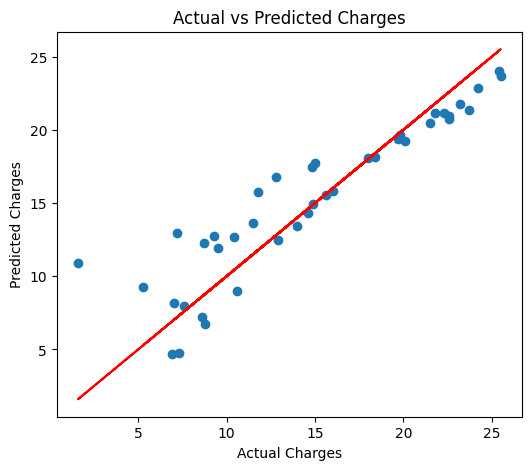

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6,5))
plt.scatter(Y_test, prediction)
plt.plot(Y_test, Y_test, color='red')
plt.title("Actual vs Predicted Charges")
plt.xlabel("Actual Charges")
plt.ylabel("Predicted Charges")
plt.show()



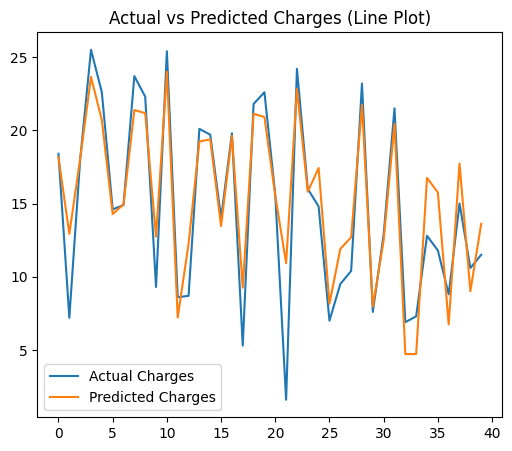

In [ ]:
plt.figure(figsize=(6,5))
plt.plot(Y_test.values, label="Actual Charges")
plt.plot(prediction, label="Predicted Charges")
plt.title("Actual vs Predicted Charges (Line Plot)")
plt.legend()
plt.show()


In [ ]:
import pickle
with open("model.sav", "wb") as f:
  pickle.dump(model,f)